# Exploration GoBike 2017
## by Frederick Yen

## Investigation Overview

This presentation will be exploring the user behavior differences between the subscribers and customers of Go Bike in 2017. The main factors include ride start/end time and duration.

## Dataset Overview

The dataset being used for exploration is the 2017 Ford GoBike trip data dataset. It contains 13 columns with 519,700 non-null entries. Each entry contains trip info such as duration (int), start/end time (object), bike/station ID (int), station lat/long (float), and more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trip_data = pd.read_csv('2017-fordgobike-tripdata.csv')

# Create copy of clean data
trip_data_clean = trip_data.copy()

# CODE
trip_data_clean['start_time'] = pd.to_datetime(trip_data_clean['start_time'])
trip_data_clean['end_time'] = pd.to_datetime(trip_data_clean['end_time'])

trip_data_clean['start_month'] = trip_data_clean['start_time'].dt.month
trip_data_clean['end_month'] = trip_data_clean['end_time'].dt.month
trip_data_clean['start_day'] = trip_data_clean['start_time'].dt.day
trip_data_clean['end_day'] = trip_data_clean['end_time'].dt.day
trip_data_clean['start_hour'] = trip_data_clean['start_time'].dt.hour
trip_data_clean['end_hour'] = trip_data_clean['end_time'].dt.hour

trip_data_clean['duration_min'] = trip_data_clean['duration_sec'].floordiv(60) 
# Focus on the main distribution
trip_data_clean.drop(trip_data_clean[trip_data_clean['duration_min'] > 80].index, inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Rush Hour

Subscribers use the bikes the most around rush hour while the customers have no outstanding peaks of usage throughout the day.

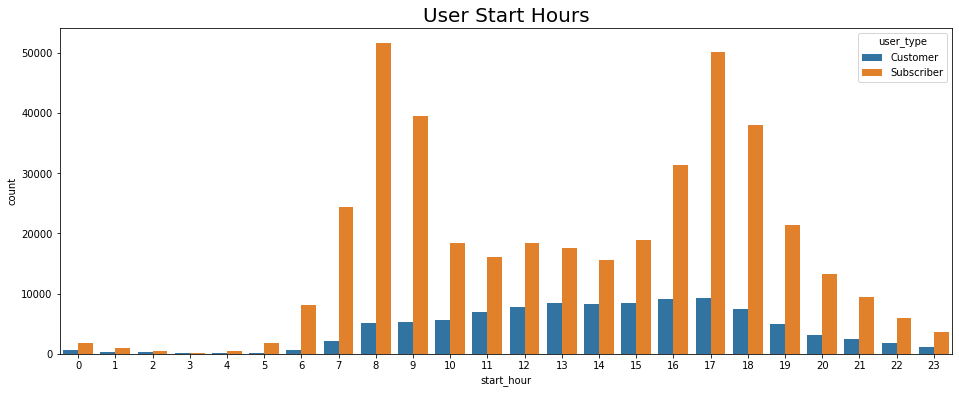

In [3]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title("User Start Hours",fontsize=20)
sb.countplot(data = trip_data_clean, x = 'start_hour', hue = 'user_type');

## Riding Every Month

Overall trend of number of rides through the months are similar when comparing subscribers to customers. Even though the number of rides for subscribers are 4~5 times more than the customers, most rides happened between September and November for both of the user groups.

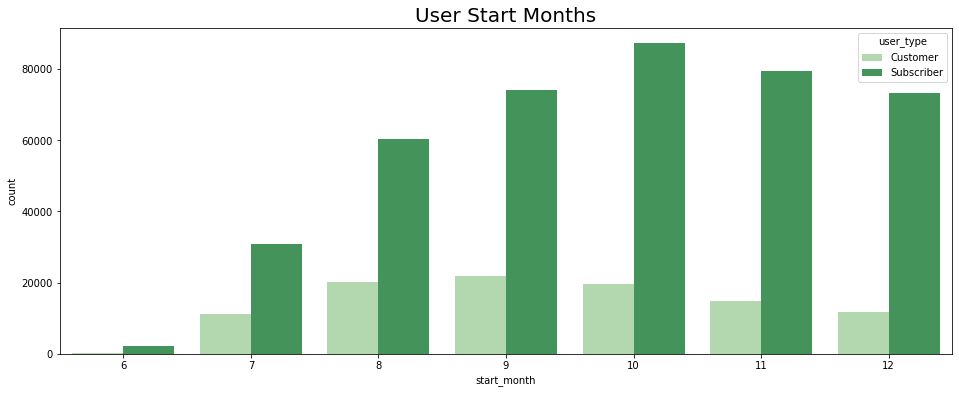

In [4]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title("User Start Months", fontsize=20)
sb.countplot(data = trip_data_clean, x = 'start_month', hue = 'user_type', palette = 'Greens');

## Day Rides

Customers have the longest rides when the bikes are checked out around noon. On the other hand, subscribers have a relative consistent ride duration through the whole day.


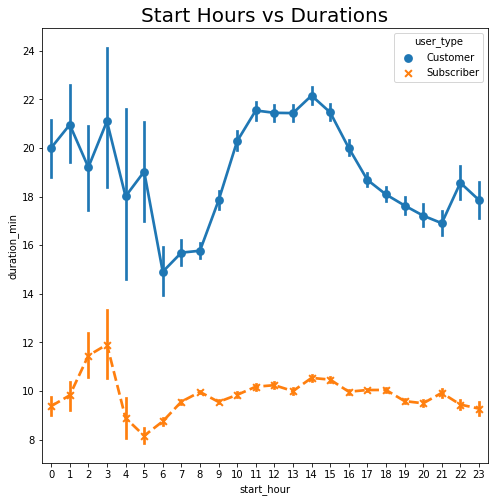

In [5]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title("Start Hours vs Durations", fontsize=20)
sb.pointplot(x="start_hour", y="duration_min", hue="user_type",
                   data=trip_data_clean,
                   markers=["o", "x"],
                   linestyles=["-", "--"]);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!